In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [32]:
data = pd.read_csv('February 19.csv', index_col=0)

Start off with the correlation matrix to understand the relationship between the different variables.

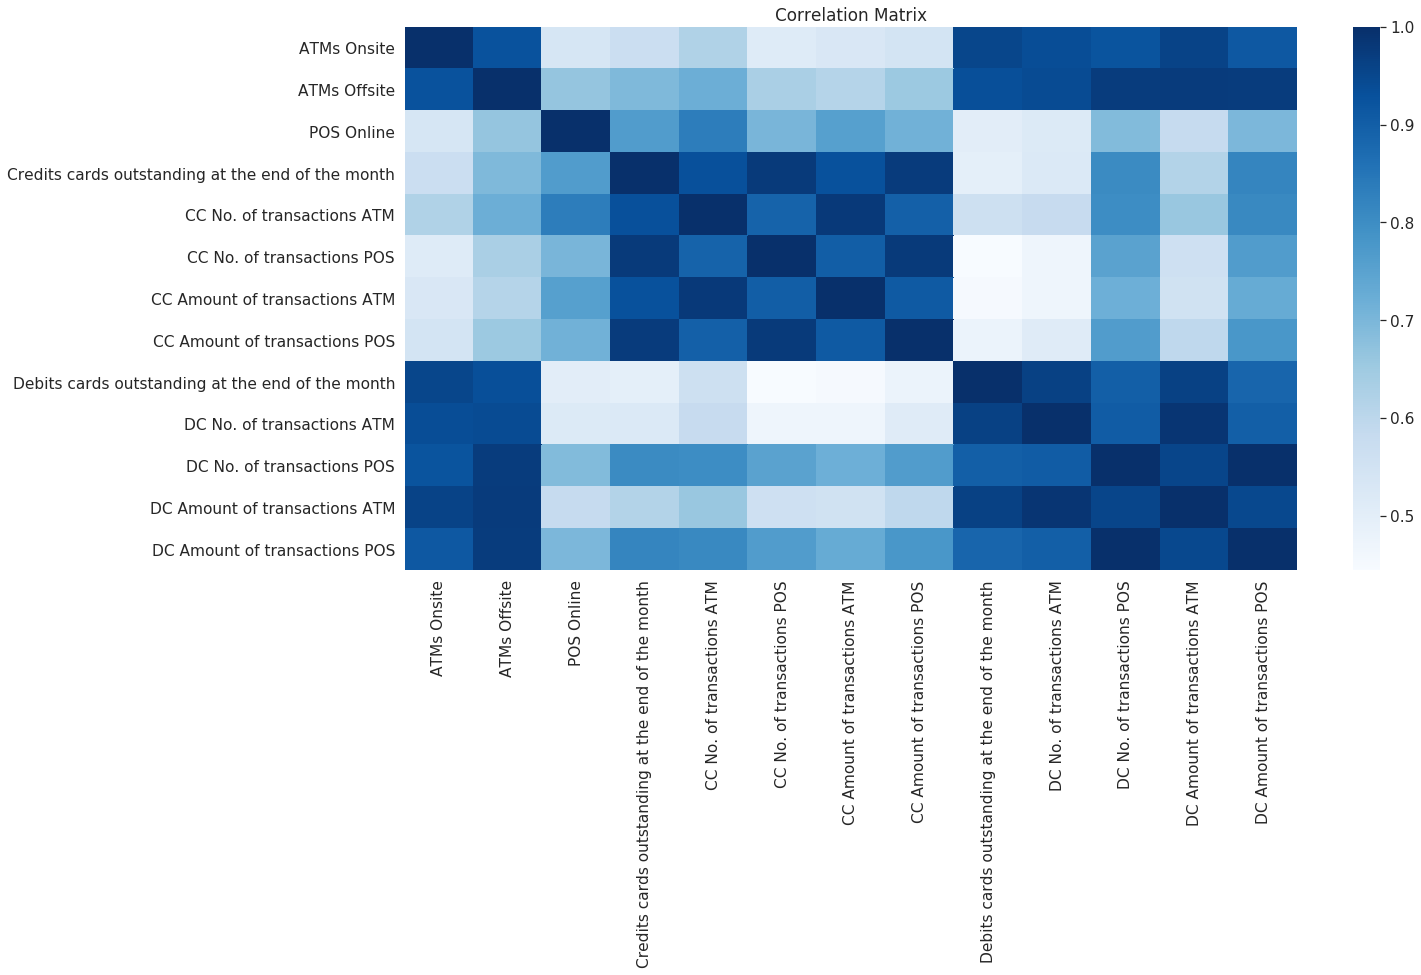

In [33]:
corr = data.corr()

plt.figure(figsize=(20, 10))

sns.set(font_scale=1.4)
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="Blues")
plt.title("Correlation Matrix")

plt.show()

This clearly shows that debit card transactions and no. of ATMs highly correlate. This makes sense as the bank with the maximum no. of debit card holders will have the maximum customer base, hence resulting in the highest no. of transactions and the highest no. of ATMs.



An interesting feature to note is that credit card transactions correlate (~ 0.75) with debit card POS transactions. This happens because credit cards are mostly used for POS transactions, in restaurants, shopping malls, etc., and rarely for ATM transactions.

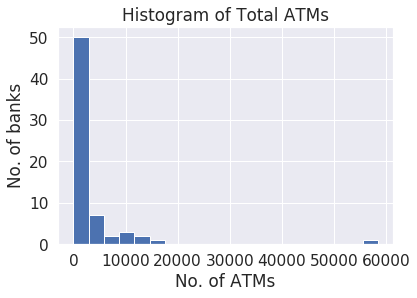

In [34]:
# Calculate total no. of ATMs.

data["Total ATMs"] = data["ATMs Onsite"] + data["ATMs Offsite"] 

plt.hist(data["Total ATMs"], bins=20)
plt.xlabel("No. of ATMs")
plt.ylabel("No. of banks")
plt.title("Histogram of Total ATMs")
plt.show()

Majority of the banks have < 5000 ATMs.

The one outlier is State Bank Of India with ~ 58000 ATMs, which is the largest bank of India.

The data is highly skewed.

In [35]:
print(data["Total ATMs"].mean())

print(np.percentile(data["Total ATMs"], [0, 25, 50, 75, 100]))

3073.3636363636365
[    0.     113.75  1100.    2600.25 58376.  ]


In [36]:
# Z scale the data because in different columns the data varies a lot from each other.

data_zscaled = data.copy()
data_zscaled = data_zscaled.drop('Bank Name', axis=1)

data_zscaled = data_zscaled.apply(zscore)

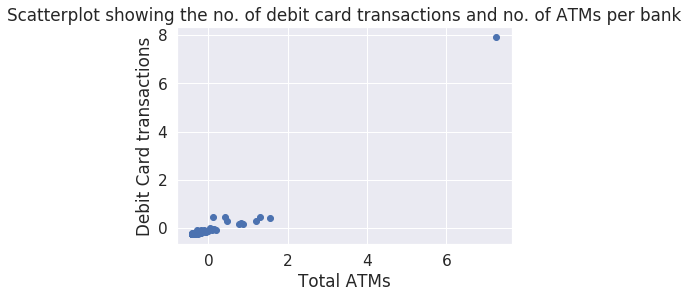

In [37]:
plt.scatter(data_zscaled['Total ATMs'], data_zscaled['DC No. of transactions ATM'])
plt.title("Scatterplot showing the no. of debit card transactions and no. of ATMs per bank")
plt.xlabel("Total ATMs")
plt.ylabel("Debit Card transactions")
plt.show()

The outlier is State Bank Of India. This plot can't be viewed very well, so another plot with the value of SBI removed is made.


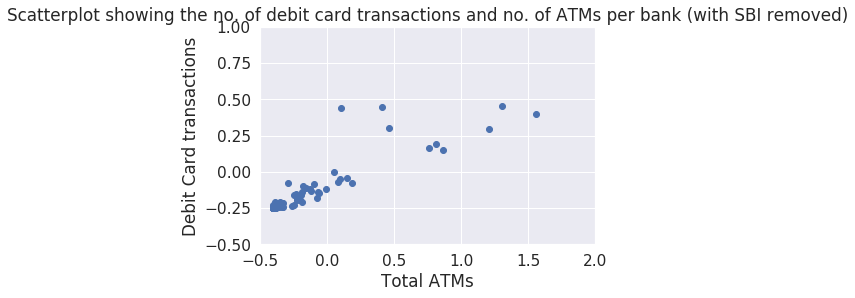

In [38]:
plt.scatter(data_zscaled['Total ATMs'], data_zscaled['DC No. of transactions ATM'])
plt.xlim(-0.5, 2)
plt.ylim(-0.5, 1)
plt.title("Scatterplot showing the no. of debit card transactions and no. of ATMs per bank (with SBI removed)")
plt.xlabel("Total ATMs")
plt.ylabel("Debit Card transactions")
plt.show()

The relationship between the 2 variables is almost linear, the bank with a high no. of ATMs experiences a high no. of debit card transactions.

However, there are a few banks with less no. of ATMs with a high no. of debit card transactions.

To learn more about this situation, the no. of transactions per ATM for a specific bank are calculated.

In [39]:
# Find the no. of transactions per atm for different banks.

data['trans_per_atm'] = 0

for i in range(len(data)):

    if data['Total ATMs'][i] !=0 :
        data['trans_per_atm'][i] = data['DC No. of transactions ATM'][i] / data['Total ATMs'][i]
        
    else:
        data['trans_per_atm'][i] = 0

/home/ankita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ankita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


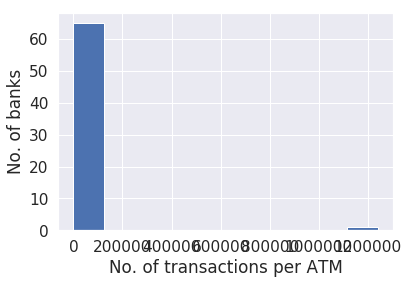

In [40]:
plt.hist(data['trans_per_atm'])
plt.xlabel("No. of transactions per ATM")
plt.ylabel("No. of banks")
plt.show()

In [41]:
print(data['trans_per_atm'].mean())

print(np.percentile(data['trans_per_atm'], [25, 50, 75]))

22010.257575757576
[1079.75 2281.   3685.5 ]


The mean comes out to be a value which is far above the 75th percentile.
This happens because of the one value that is ~1200000. 

The histogram also doesn't help much in understanding the situation.

We divide the dataset into 2 parts - one with all the points lying below the 75th percentile and the other with all the points lying above.

In [42]:
data_below_75P = data[data['trans_per_atm'] < 3685]

data_above_75P = data[data['trans_per_atm'] > 3685]

In [43]:
print(len(data_below_75P))

data_below_75P.head(10)

49


Bank Name  ATMs Onsite  ATMs Offsite  POS Online  \
1                 ANDHRA BANK         3025           773       15895   
2              BANK OF BARODA         6430          3247       51960   
4         BANK OF MAHARASHTRA         1314           556        3105   
5                 CANARA BANK         4769          4107       20800   
6       CENTRAL BANK OF INDIA         3081          1086        3379   
7            CORPORATION BANK         2359           658      161588   
8                   DENA BANK         1221           292        5342   
10       INDIAN OVERSEAS BANK         2946           511       19750   
11  ORIENTAL BANK OF COMMERCE         2342           283        8408   
12       PUNJAB AND SIND BANK         1154            48        1066   

    Credits cards outstanding at the end of the month  \
1                                              297282   
2                                              216885   
4                                                   0   
5                                              356237   
6                                               93220   
7                                              110149   
8                                                   0   
10                                              57753   
11                                                  0   
12                                                  0   

    CC No. of transactions ATM  CC No. of transactions POS  \
1                        14808                      523048   
2                         8515                      526791   
4                            0                           0   
5                        42990                      588560   
6                         2187                      142782   
7                         1826                      135947   
8                            0                           0   
10                         851                       82894   
11                           0                           0   
12                           0                           0   

    CC Amount of transactions ATM  CC Amount of transactions POS  \
1                              74                           1288   
2                              32                           1156   
4                               0                              0   
5                             222                           1196   
6                               9                            313   
7                               8                            323   
8                               0                              0   
10                              3                            162   
11                              0                              0   
12                              0                              0   

    Debits cards outstanding at the end of the month  \
1                                           28048189   
2                                           59918420   
4                                            5085031   
5                                           36820396   
6                                           18976200   
7                                           13024108   
8                                            5401680   
10                                          16279422   
11                                          11067454   
12                                           2025337   

    DC No. of transactions ATM  DC No. of transactions POS  \
1                      9846798                     5858733   
2                     19719888                    10904078   
4                      6772706                     3983391   
5                     20462769                    10170485   
6                     10239076                     5238091   
7                      6659907                     3533072   
8                      2967788                     1680293   
10                    12500117                     424

49 out of 66 banks have the no. of transactions per ATM below the 75th percentile value.

This dataframe comprises of mostly the regional banks like Karnataka Bank, Punjab and Sind Bank, etc. and small finance banks.

A lot of the payments bank also lie in this section as they don't have ATMs. 

Popular private banks like Axis Bank, ICICI Bank, HDFC Bank, etc. are also a part of this dataframe. This could be a  result of the no. of ATMs being at par with the no. of transactions taking place, resulting in a lower fraction.

N. B. - To know more about small finance and payments banks, visit https://github.com/Anpr1211/Proposal/blob/master/README.md .

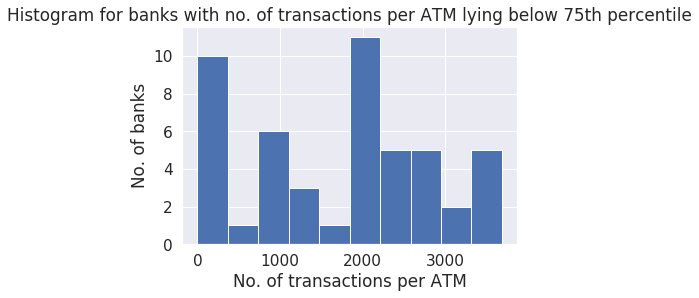

In [44]:
plt.hist(data_below_75P['trans_per_atm'])
plt.title("Histogram for banks with no. of transactions per ATM lying below 75th percentile")
plt.xlabel("No. of transactions per ATM")
plt.ylabel("No. of banks")
plt.show()

If we don't consider the 1st bar which corresponds to the value 0, the distribution seems to follow some sort of bimodal distribution which becomes approximately constant after the 2nd mode, except for one class.

In [45]:
print(len(data_above_75P))

data_above_75P.head(10)

17


Bank Name  ATMs Onsite  ATMs Offsite  POS Online  \
0                 ALLAHABAD BANK          631           200        3176   
3                  BANK OF INDIA         2596          3558       64884   
9                    INDIAN BANK         3135           740       10591   
16           UNION BANK OF INDIA         3831          2748       50692   
20           STATE BANK OF INDIA        25560         32816      579508   
22              BANDHAN BANK LTD          481             0       26045   
27              FEDERAL BANK LTD         1179           489        9716   
30             IDFC Bank Limited          107             6        1789   
32        JAMMU AND KASHMIR BANK          728           557       17070   
38  TAMILNAD MERCANTILE BANK LTD          472           680        4663   

    Credits cards outstanding at the end of the month  \
0                                                   0   
3                                              184049   
9                                               87102   
16                                              46567   
20                                            7998808   
22                                                  0   
27                                                  0   
30                                                  0   
32                                             137750   
38                                              18253   

    CC No. of transactions ATM  CC No. of transactions POS  \
0                            0                           0   
3                        22048                      287734   
9                         2656                      123776   
16                        3612                      192100   
20                      135768                    22340028   
22                           0                           0   
27                           0                           0   
30                           0                           0   
32                        8186                      194113   
38                        2386                       41790   

    CC Amount of transactions ATM  CC Amount of transactions POS  \
0                               0                              0   
3                             122                            716   
9                              15                            264   
16                             18                            485   
20                            522                          85527   
22                              0                              0   
27                              0                              0   
30                              0                              0   
32                             27                            764   
38                             10                            155   

    Debits cards outstanding at the end of the month  \
0                                            6049046   
3                                           59139931   
9                                           18579046   
16                                          16180686   
20                                         326078311   
22                                           2789018   
27                                           5480333   
30                                           1429815   
32                                           3767846   
38                                           1352578   

    DC No. of transactions ATM  DC No. of transactions POS  \
0                      8736133                     2893368   
3                     34343155                     8217880   
9                     34072269                     6063928   
16                    27121255                     4217910   
20                   401232064                    98839407   
22                     1939588                      795328   
27                     7455366                     4050566   
30                     2

The datapoint with ~12L transactions per ATM is PayTM payments bank, which has only 1 ATM but 12L transactions per month. This is because payments banks treat all the accounts on their platform as virtual debit cards, and hence, any transaction that take place online through them counts as a debit card transaction.

For further analysis, this datapoint needs to be removed from the dataframe.

The most popular government banks like SBI, Allahabad Bank, etc. lie here. 

Few banks like Standard Chartered Bank, HSBC Bank are present in this dataframe as the no. of their ATMs is quite low, resulting in a larger fraction.

16


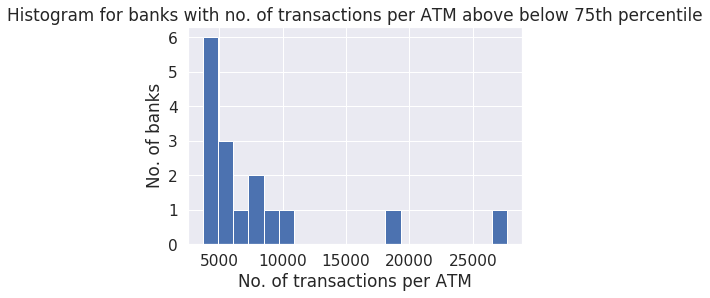

In [46]:
data_above_75P = data_above_75P.drop(data_above_75P.index[13])
print(len(data_above_75P))

plt.hist(data_above_75P['trans_per_atm'], bins=20)
plt.title("Histogram for banks with no. of transactions per ATM above below 75th percentile")
plt.xlabel("No. of transactions per ATM")
plt.ylabel("No. of banks")
plt.show()

The histogram seems to follow an exponential distribution, where the no. of banks with high no. of transactions per ATM falls rapidly.

Now consider the banks which have the most no. of ATMs, the datapoints which lie above the 75th percentile of the Total no. of ATMs

In [47]:
max_ATMs = data[data['Total ATMs'] > 2600]

max_ATMs.head(10)

Bank Name  ATMs Onsite  ATMs Offsite  POS Online  \
1                 ANDHRA BANK         3025           773       15895   
2              BANK OF BARODA         6430          3247       51960   
3               BANK OF INDIA         2596          3558       64884   
5                 CANARA BANK         4769          4107       20800   
6       CENTRAL BANK OF INDIA         3081          1086        3379   
7            CORPORATION BANK         2359           658      161588   
9                 INDIAN BANK         3135           740       10591   
10       INDIAN OVERSEAS BANK         2946           511       19750   
11  ORIENTAL BANK OF COMMERCE         2342           283        8408   
13       PUNJAB NATIONAL BANK         5332          3919       63465   

    Credits cards outstanding at the end of the month  \
1                                              297282   
2                                              216885   
3                                              184049   
5                                              356237   
6                                               93220   
7                                              110149   
9                                               87102   
10                                              57753   
11                                                  0   
13                                             333089   

    CC No. of transactions ATM  CC No. of transactions POS  \
1                        14808                      523048   
2                         8515                      526791   
3                        22048                      287734   
5                        42990                      588560   
6                         2187                      142782   
7                         1826                      135947   
9                         2656                      123776   
10                         851                       82894   
11                           0                           0   
13                        7410                      558175   

    CC Amount of transactions ATM  CC Amount of transactions POS  \
1                              74                           1288   
2                              32                           1156   
3                             122                            716   
5                             222                           1196   
6                               9                            313   
7                               8                            323   
9                              15                            264   
10                              3                            162   
11                              0                              0   
13                             33                           1180   

    Debits cards outstanding at the end of the month  \
1                                           28048189   
2                                           59918420   
3                                           59139931   
5                                           36820396   
6                                           18976200   
7                                           13024108   
9                                           18579046   
10                                          16279422   
11                                          11067454   
13                                          72673656   

    DC No. of transactions ATM  DC No. of transactions POS  \
1                      9846798                     5858733   
2                     19719888                    10904078   
3                     34343155                     8217880   
5                     20462769                    10170485   
6                     10239076                     5238091   
7                      6659907                     3533072   
9                     34072269                     6063928   
10                    12500117                     424

All the major well known banks of India are also the ones with the most no. of ATMs which is expected.